In [60]:
year = '2021'
conference = 'cvpr'

In [61]:
from pandas import read_csv
file_name = conference + '_' + year + '.csv'

#读取标题
df = read_csv(file_name,usecols = ['Title'])
#转换为list
title = df.values.tolist()

In [62]:
a = "".join(title[1])

In [63]:
print(type(a))

<class 'str'>


In [64]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter

print(stopwords.words('english'))

stopwords_deep_learning = ['learning', 'network', 'neural', 'networks', 'deep', 'via', 'using', 'convolutional', 'single']

keyword_list = []

for i in range(len(title)):
  
  print(i, "th paper's title : ", title[i])
  
  #将数组转换成string 再分割
  word_list = "".join(title[i]).split(" ")
  word_list = list(set(word_list))
    
  word_list_cleaned = [] 
  for word in word_list: 
    word = word.lower()
    if word not in stopwords.words('english') and word not in stopwords_deep_learning: #remove stopwords
          word_list_cleaned.append(word)  
    
  for k in range(len(word_list_cleaned)):
    keyword_list.append(word_list_cleaned[k])
  
keyword_counter = Counter(keyword_list)
print(keyword_counter)  

print('{} different keywords before merging'.format(len(keyword_counter)))

# Merge duplicates: CNNs and CNN
duplicates = []
for k in keyword_counter:
    if k+'s' in keyword_counter:
        duplicates.append(k)
for k in duplicates:
    keyword_counter[k] += keyword_counter[k+'s']
    del keyword_counter[k+'s']
print('{} different keywords after merging'.format(len(keyword_counter)))
print(keyword_counter)  

print("")

[nltk_data] Error loading stopwords: <urlopen error [Errno 11004]
[nltk_data]     getaddrinfo failed>
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few

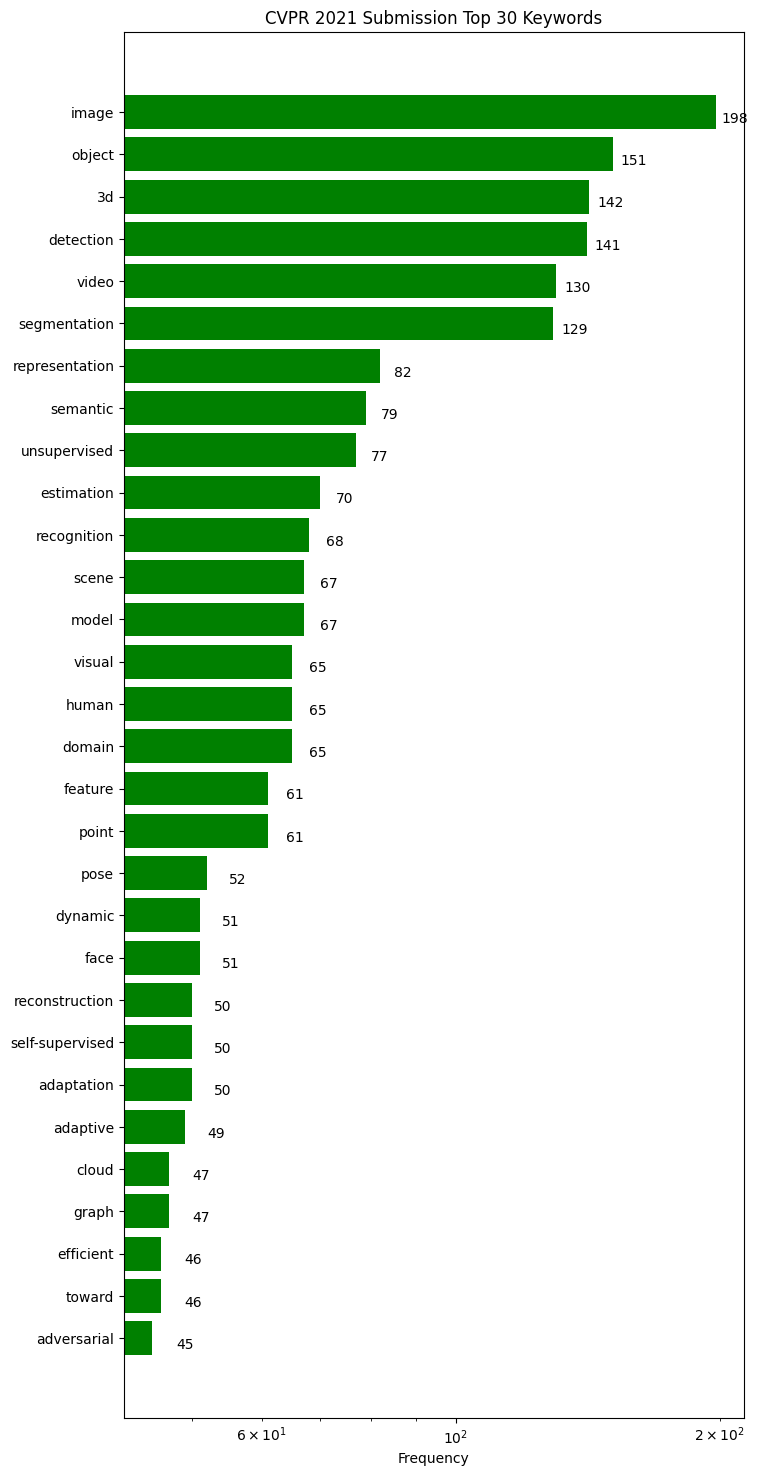

In [75]:
import matplotlib.pyplot as plt 
import numpy as np
# Show N most common keywords and their frequencies
num_keyowrd = 30 #FIXME
keywords_counter_vis = keyword_counter.most_common(num_keyowrd)

plt.rcdefaults()
fig, ax = plt.subplots(figsize=(8, 18))

key = [k[0] for k in keywords_counter_vis] 
value = [k[1] for k in keywords_counter_vis] 
y_pos = np.arange(len(key))
ax.barh(y_pos, value, align='center', color='green', ecolor='black', log=True)
ax.set_yticks(y_pos)
ax.set_yticklabels(key, rotation=0, fontsize=10)
ax.invert_yaxis() 
for i, v in enumerate(value):
    ax.text(v + 3, i + .25, str(v), color='black', fontsize=10)
ax.set_xlabel('Frequency')
ax.set_title('{} {} Submission Top {} Keywords'.format(conference.upper(), year, num_keyowrd))
# plt.savefig('frequent.png', transparent=False, bbox_inches='tight')
plt.show()

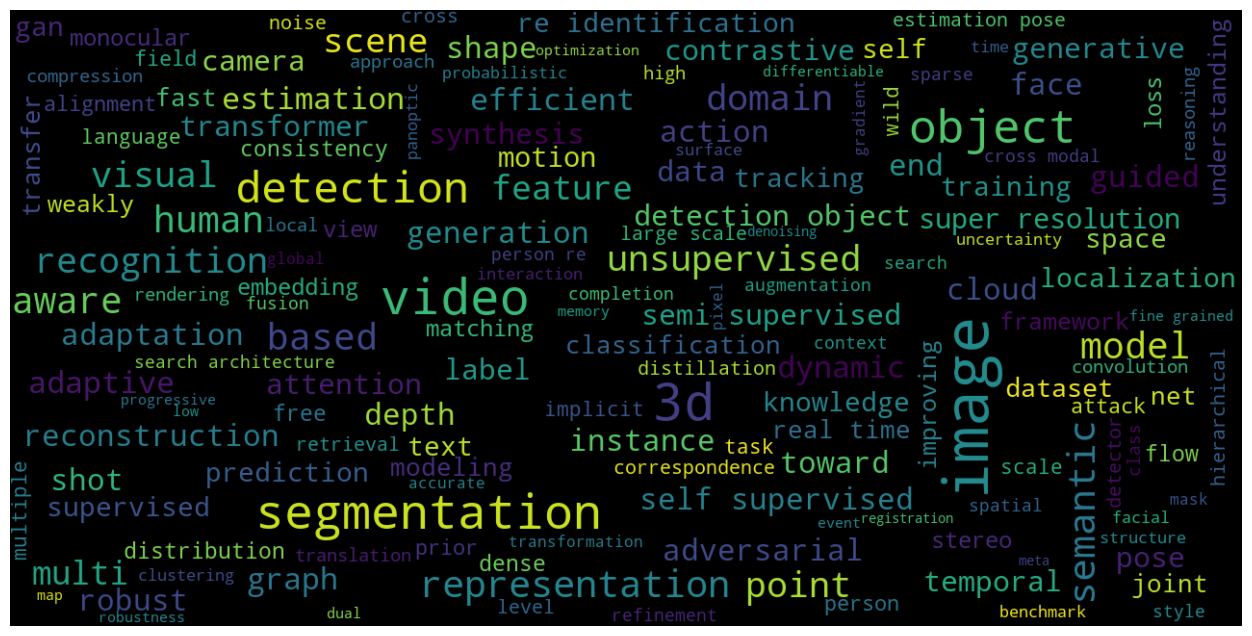

In [66]:
# Show the word cloud forming by keywords
from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=64, max_words=160, 
                      width=1280, height=640,
                      background_color="black").generate(' '.join(keyword_list))
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()